In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

C:\Users\ticar\AppData\Local\Temp\ipykernel_25492\1127981252.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
USBandwidthData = {
    "City": [
       "Bristol, VA",
       "Chattanooga, TN", 
       "Lafayette, LA",
       "Los Angeles, CA",
       'New York, NY',
       'San Francisco, CA',
       "Ammon, ID",
       "Atlanta, GA",
       "Chattanooga, TN",
       "Cleveland, OH",
       "Fort Collins, CO",
       "Kansas City, KS",
       "Kansas City, MO",
       "Lafayette, LA",
       "London",
       "Los Angeles, CA",
       "New York, NY",
       "San Francisco, CA",
       "Seattle, WA",
       "Washington, DC",
       "Wilson, NC",
        
       
    ],
    "Year": [ 2012,2012,2012,2012,2012,2012, 2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020],
    "Average Peak Download Speed (Mbps)": [
        129,
        119,
        41,
        19,
        37,
        41,

        313,
        788,
        975,
        338,
        858,
        279,
        299,
        1096,
        104,
        248,
        305,
        370,
        424,
        483,
        348,
    ],
    "Median Peak Download Speed (Mbps)": [
        25,
        30,
        33,
        16.5,
        20,
        30,

        100,
        200,
        250,
        100,
        225,
        125,
        100,
        300,
        42,
        72.5,
        200,
        100,
        200,
        300,
        150,
    ],
    "Average Monthly Price, $": [
        100.22,
        98.44,
        78.47,
        54.194,
        73.18,
        63.07,
        
        40.88,
        105.36,
        73.73,
        55.23,
        88.99,
        71.15,
        67.07,
        80.14,
        39.48,
        49.83,
        64.94,
        60.54,
        67.61,
        70.72,
        68.1,
    ],
    "Median Monthly Price, $": [
        54.95,
        62.47,
        58.99,
        51.495,
        58.98,
        62.95,

        45,
        65,
        57.99,
        50,
        60,
        50,
        54.95,
        56.45,
        34.99,
        47.5,
        54.99,
        49.95,
        54.99,
        57.49,
        62.47,
    ]
}

USBandwidthDF = pd.DataFrame(USBandwidthData)

Correlation in 2020:  0.7262279212477093
12.60171437644523 -361.4148559762949


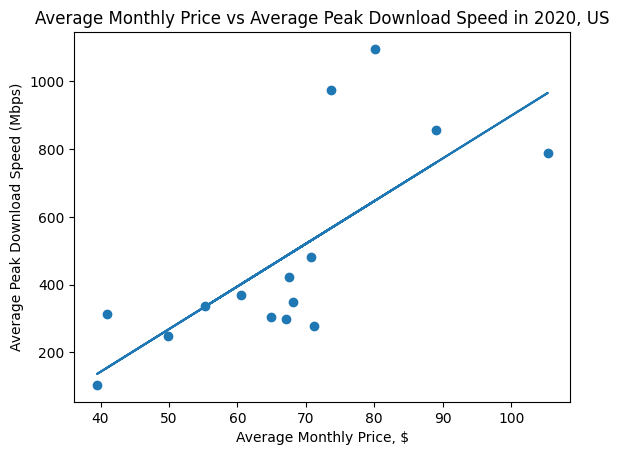

Correlation in 2012:  0.9393289464265414
2.3789226890309876 -121.05373290016242


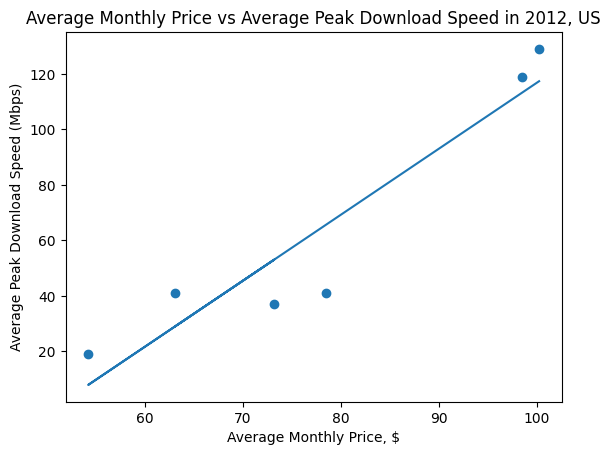

In [3]:
data_2020 = USBandwidthDF[USBandwidthDF["Year"] == 2020]
data_2012 = USBandwidthDF[USBandwidthDF["Year"] == 2012]

# calculate the correlation between the two variables
correlation_2020 = data_2020["Average Monthly Price, $"].corr(data_2020["Average Peak Download Speed (Mbps)"])
correlation_2012 = data_2012["Average Monthly Price, $"].corr(data_2012["Average Peak Download Speed (Mbps)"])

print("Correlation in 2020: ", correlation_2020)

plt.scatter(data_2020["Average Monthly Price, $"], data_2020["Average Peak Download Speed (Mbps)"])
plt.xlabel("Average Monthly Price, $")
plt.ylabel("Average Peak Download Speed (Mbps)")
plt.title("Average Monthly Price vs Average Peak Download Speed in 2020, US")

# plot a linear regression line
m, b = np.polyfit(data_2020["Average Monthly Price, $"], data_2020["Average Peak Download Speed (Mbps)"], 1)
print(m, b)
plt.plot(data_2020["Average Monthly Price, $"], m*data_2020["Average Monthly Price, $"] + b)
plt.show()

print("Correlation in 2012: ", correlation_2012)

plt.scatter(data_2012["Average Monthly Price, $"], data_2012["Average Peak Download Speed (Mbps)"])
plt.xlabel("Average Monthly Price, $")
plt.ylabel("Average Peak Download Speed (Mbps)")
plt.title("Average Monthly Price vs Average Peak Download Speed in 2012, US")

# plot a linear regression line
m, b = np.polyfit(data_2012["Average Monthly Price, $"], data_2012["Average Peak Download Speed (Mbps)"], 1)
print(m, b)
plt.plot(data_2012["Average Monthly Price, $"], m*data_2012["Average Monthly Price, $"] + b)
plt.show()

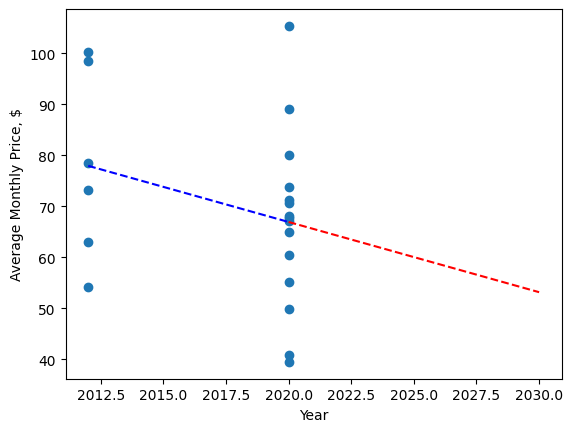

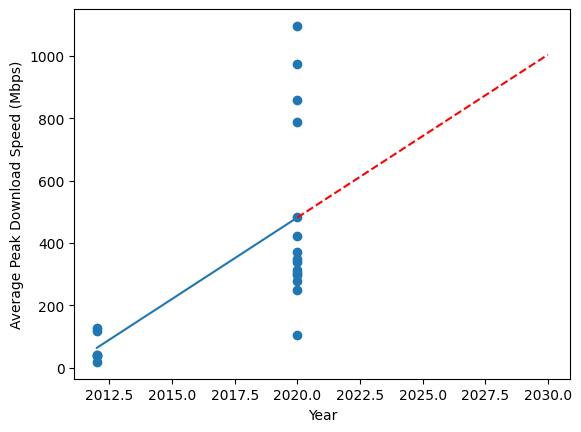

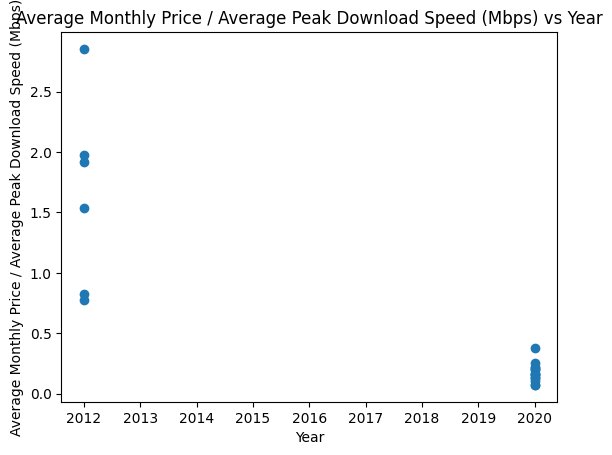

In [21]:
# plot the average monthly price vs year
plt.scatter(USBandwidthDF["Year"], USBandwidthDF["Average Monthly Price, $"])
plt.xlabel("Year")
plt.ylabel("Average Monthly Price, $")

# plot a linear regression line
m, b = np.polyfit(USBandwidthDF["Year"], USBandwidthDF["Average Monthly Price, $"], 1)
plt.plot(USBandwidthDF["Year"], m*USBandwidthDF["Year"] + b, "b--")

# extrapolate by 10 years and plot the line
plt.plot([2020, 2030], [m*2020 + b, m*2030 + b], "r--")

plt.show()

# plot the average peak download speed vs year
plt.scatter(USBandwidthDF["Year"], USBandwidthDF["Average Peak Download Speed (Mbps)"])
plt.xlabel("Year")
plt.ylabel("Average Peak Download Speed (Mbps)")

# plot a linear regression line
m, b = np.polyfit(USBandwidthDF["Year"], USBandwidthDF["Average Peak Download Speed (Mbps)"], 1)
plt.plot(USBandwidthDF["Year"], m*USBandwidthDF["Year"] + b)

# extrapolate by 10 years and plot the line
plt.plot([2020, 2030], [m*2020 + b, m*2030 + b], "r--")
plt.show()

# plot the average monthly price per average peak download speed Mbps per vs years
plt.scatter(USBandwidthDF["Year"], USBandwidthDF["Average Monthly Price, $"] / USBandwidthDF["Average Peak Download Speed (Mbps)"])
plt.xlabel("Year")
plt.ylabel("Average Monthly Price / Average Peak Download Speed (Mbps)")
plt.title("Average Monthly Price / Average Peak Download Speed (Mbps) vs Year")
plt.show()